In [1]:
import numpy as np
import os
#加载并可视化手写数字
import matplotlib.pyplot as plt

# 训练集
with open('E:/pycharm/project/mnist_data/train-images.idx3-ubyte') as f:
    loaded = np.fromfile(file = f, dtype = np.uint8)
    train_data = loaded[16:].reshape((60000, 784))
print(train_data.shape) # (60000, 784)


with open('E:/pycharm/project/mnist_data/train-labels.idx1-ubyte') as f:
    loaded = np.fromfile(file = f, dtype = np.uint8)
    train_labels = loaded[8:]
print(train_labels.shape) # (60000,)


# 测试集
with open('E:/pycharm/project/mnist_data/t10k-images.idx3-ubyte') as f:
    loaded = np.fromfile(file=f, dtype=np.uint8)
    test_data = loaded[16:].reshape((10000, 784))
print(test_data.shape) # (10000, 784)

with open('E:/pycharm/project/mnist_data/t10k-labels.idx1-ubyte') as f:
    loaded = np.fromfile(file=f, dtype=np.uint8)
    test_labels = loaded[8:].reshape((10000))
print(test_labels.shape) # (10000,)
# print(train_data[0])
# print(train_labels[0])
list = [0,0,0,0,0,0,0,0,0,0]
for i  in train_labels:
    list[i]+=1
print(list)  
list = [0,0,0,0,0,0,0,0,0,0]
for i  in test_labels:
    list[i]+=1
print(list)

(60000, 784)
(60000,)
(10000, 784)
(10000,)
[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]
[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]


In [2]:

from cs231n.classifiers import KNearestNeighbor
import random
# import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2


# Create a kNN classifier instance. 
# Remember that training a kNN classifier is a noop: 
# the Classifier simply remembers the data and does no further processing 
classifier = KNearestNeighbor()
classifier.train(train_data,train_labels)

In [3]:
import time
tic = time.time()
# (test_data,test_labels)

dists = classifier.compute_distances_no_loops(test_data)
print(dists.shape)
toc = time.time()
no_loop_time = toc-tic
print('No loop version took %f seconds' % no_loop_time)
print('totally cost: %d h %d min %f s ' % ((no_loop_time)/3600, (no_loop_time)/60%60, (no_loop_time) % 60))

(10000, 60000)
No loop version took 275.517143 seconds
totally cost: 0 h 4 min 35.517143 s 


E:\pycharm\project\assignment1\cs231n\classifiers\k_nearest_neighbor.py:144: RuntimeWarning: invalid value encountered in sqrt
  dists = np.sqrt(dists)


In [8]:
k_choices =  range(1, 30)
accuracy_list =[]

for k in k_choices:
    y_test_pred = classifier.predict_labels(dists, k=k)
    num_correct = np.sum(y_test_pred == test_labels)
    accuracy = float(num_correct) / test_data.shape[0]
    accuracy_list.append(accuracy)
#     print(accuracy)
    print('Got %d / %d correct => accuracy: %f' % (num_correct,test_data.shape[0], accuracy))


Got 1134 / 10000 correct => accuracy: 0.113400
Got 1125 / 10000 correct => accuracy: 0.112500
Got 1104 / 10000 correct => accuracy: 0.110400
Got 1130 / 10000 correct => accuracy: 0.113000
Got 1116 / 10000 correct => accuracy: 0.111600
Got 1124 / 10000 correct => accuracy: 0.112400
Got 1135 / 10000 correct => accuracy: 0.113500
Got 1125 / 10000 correct => accuracy: 0.112500
Got 1131 / 10000 correct => accuracy: 0.113100
Got 1138 / 10000 correct => accuracy: 0.113800
Got 1136 / 10000 correct => accuracy: 0.113600
Got 1137 / 10000 correct => accuracy: 0.113700
Got 1137 / 10000 correct => accuracy: 0.113700
Got 1135 / 10000 correct => accuracy: 0.113500
Got 1136 / 10000 correct => accuracy: 0.113600
Got 1136 / 10000 correct => accuracy: 0.113600
Got 1135 / 10000 correct => accuracy: 0.113500
Got 1135 / 10000 correct => accuracy: 0.113500
Got 1135 / 10000 correct => accuracy: 0.113500
Got 1135 / 10000 correct => accuracy: 0.113500
Got 1135 / 10000 correct => accuracy: 0.113500
Got 1135 / 10

[0.1134, 0.1125, 0.1104, 0.113, 0.1116, 0.1124, 0.1135, 0.1125, 0.1131, 0.1138, 0.1136, 0.1137, 0.1137, 0.1135, 0.1136, 0.1136, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135]


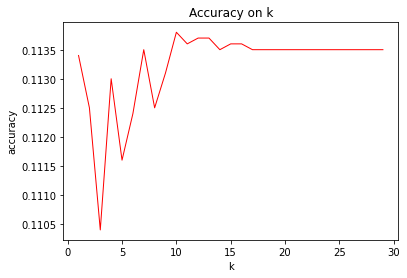

In [10]:
print(accuracy_list)

plt.plot(k_choices,accuracy_list,color="red",linewidth=1 )
plt.title('Accuracy on k')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()